In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm, vhmm
import joblib

# Import data

Chargement des corrdonnées du museau 

In [31]:
X_head = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/head_coords.csv",  names=['Gauche_head', 'Haut_head', 'Largeur_head', 'Longeur_head'])
X_snout = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/snout_coords.csv",  names=['Gauche_snout', 'Haut_snout', 'Largeur_snout', 'Longeur_snout'])
X_cow = pd.pandas.read_csv("E:/UQAM/Recherche/Thomas/data/cow_coords.csv",  names=['Gauche_cow', 'Haut_cow', 'Largeur_cow', 'Longeur_cow'])

X = np.concatenate([X_head, X_snout, X_cow], axis=1)
lengths = [len(X_head), len(X_snout), len(X_cow)]

lengths
len(X)
X.shape



(1375, 12)

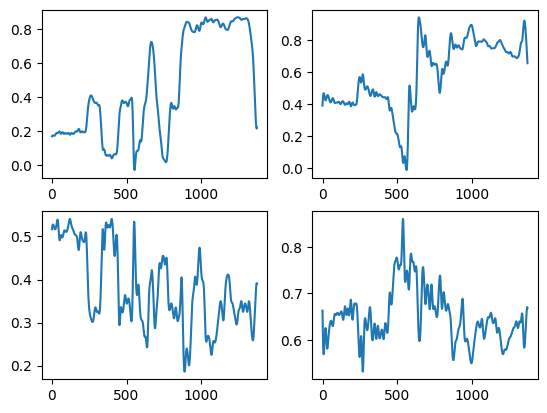

In [32]:
plt.subplot(2,2,1)
plt.plot(range(0,len(X)) , X[0:,0])
plt.subplot(2,2,2)
plt.plot(range(0,len(X)) ,X[0:,1])
plt.subplot(2,2,3)
plt.plot(range(0,len(X)) ,X[0:,2])
plt.subplot(2,2,4)
plt.plot(range(0,len(X)) ,X[0:,3])


# Train model

In [38]:
em_scores = list()
vi_scores = list()
em_models = list()
vi_models = list()
for n_components in range(2, 5):
    for idx in range(10):
        
        em_model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type = "full", n_iter=50)
        # variational inference
        vi_model = vhmm.VariationalGaussianHMM(n_components=n_components, random_state=idx, covariance_type='full', n_iter=50)
        em_model.fit(X)
        vi_model.fit(X)
        em_models.append(em_model)
        vi_models.append(vi_model)
        em_scores.append(em_model.score(X))
        vi_scores.append(vi_model.score(X))
        ll = em_model.monitor_.history[-1]
        """ print(f"Training EM({n_components}) Final Log Likelihood={ll} "
              f"Iterations={len(vi_model.monitor_.history)} ") """
        # print(f'Converged: {em_model.monitor_.converged}\t\t'f'Score: {scores[-1]}')

# get the best model
em_model = em_models[np.argmax(em_scores)]
vi_model = vi_models[np.argmax(vi_scores)]
# print(f'The best model had a score of {max(scores)} and 'f'{em_model.n_components} components')


em_Z = em_model.predict(X)
vi_Z = vi_model.predict(X)
joblib.dump(em_model, 'models/EM/hmm_model_head_snout_cow.pkl')
joblib.dump(vi_model, 'models/Vi/hmm_model_head_snout_cow.pkl')

Model is not converging.  Current: 34213.52856639865 is not greater than 34213.529272916196. Delta is -0.0007065175450406969
Model is not converging.  Current: 34213.52856392823 is not greater than 34213.52927517434. Delta is -0.0007112461098586209
Model is not converging.  Current: 34213.52860398993 is not greater than 34213.52929464264. Delta is -0.0006906527123646811
Model is not converging.  Current: 34213.52856582095 is not greater than 34213.5292734552. Delta is -0.0007076342517393641
Model is not converging.  Current: 34213.52856596995 is not greater than 34213.529273316904. Delta is -0.0007073469532770105
Model is not converging.  Current: 34213.52856352101 is not greater than 34213.52927553655. Delta is -0.0007120155423763208
Model is not converging.  Current: 34213.528570775336 is not greater than 34213.52926866873. Delta is -0.0006978933961363509
Model is not converging.  Current: 37267.90088478693 is not greater than 37268.05993098854. Delta is -0.15904620160290506
Model is

['models/Vi/hmm_model_head_snout_cow.pkl']

In [34]:
print(em_model.means_)
print(vi_model.means_)
#print(model.covars_)

[[0.15712231 0.42986053 0.50516705 0.63696224 0.16451173 0.48834298
  0.17147005 0.25400728 0.15715445 0.03885318 0.96247466 1.02813516]
 [0.82157333 0.77525571 0.32836486 0.62020116 1.00664055 0.77762978
  0.13131975 0.16621822 0.29667951 0.0840244  0.84079599 1.37118553]
 [0.28680513 0.57594528 0.35177548 0.69757622 0.33152264 0.56738045
  0.16043446 0.18909853 0.17859949 0.08306473 0.69848733 1.35084247]
 [0.36131403 0.38740663 0.33264215 0.67528033 0.4265223  0.39613484
  0.19435819 0.23725195 0.20946047 0.04073484 0.89710865 1.00436364]]
[[0.28626179 0.18319278 0.3578204  0.76048394 0.34701928 0.16798152
  0.18374518 0.20216867 0.16203001 0.04275612 0.84606916 1.03665343]
 [0.82336351 0.77436898 0.32804831 0.62005933 1.00808083 0.7767741
  0.13133456 0.16589908 0.29612595 0.08395547 0.84251035 1.37079268]
 [0.31430392 0.66873847 0.34684274 0.68243761 0.36857292 0.65926708
  0.1568231  0.18721796 0.19825528 0.090513   0.6757171  1.3874427 ]
 [0.20496934 0.44405034 0.46206089 0.6347

Text(0.5, 0.98, 'Snout and Head and cow Coordinates EM')

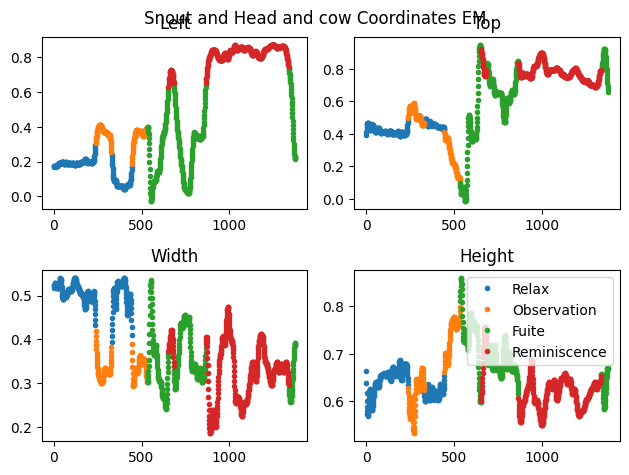

In [35]:
em_states = pd.unique(em_Z)
state_names = ['Relax', 'Observation', 'Fuite', 'Reminiscence']

plt.subplot(2,2,1)
for i in em_states:
    #print(len(X))
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,0][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Left")
plt.subplot(2,2,2)
for i in em_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,1][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Top")
plt.subplot(2,2,3)
for i in em_states:
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,2][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Width")
plt.subplot(2,2,4)
for i in em_states:
    x = np.linspace(1,len(X),len(X))[(em_Z == i)]
    y = X[0:,3][(em_Z == i)]
    plt.plot(x, y, '.')
    plt.title("Height")

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)
plt.suptitle('Snout and Head and cow Coordinates EM')
# rajouter les etiquettes 

Text(0.5, 0.98, 'Snout and Head and cow Coordinates VI')

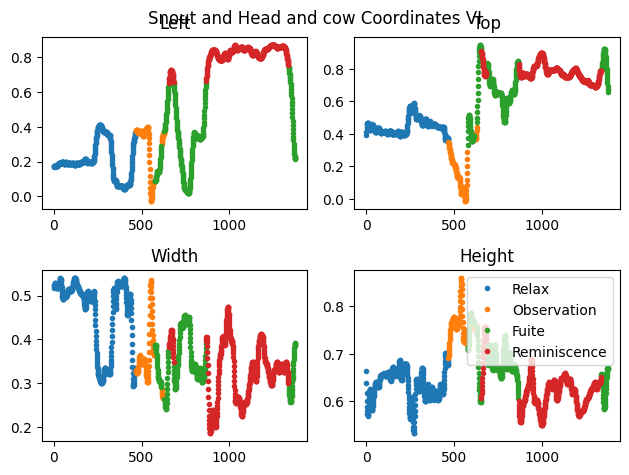

In [36]:
vi_states = pd.unique(vi_Z)

plt.subplot(2,2,1)
for i in vi_states:
    #print(len(X))
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,0][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Left')
plt.subplot(2,2,2)
for i in vi_states:
    #print(len(X[1:,0]))
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,1][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Top')
plt.subplot(2,2,3)
for i in vi_states:
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,2][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Width')
plt.subplot(2,2,4)
for i in vi_states:
    x = np.linspace(1,len(X),len(X))[(vi_Z == i)]
    y = X[0:,3][(vi_Z == i)]
    plt.plot(x, y, '.')
    plt.title('Height')

plt.tight_layout()
plt.legend(labels=state_names, loc="upper right", ncol=1)
plt.suptitle('Snout and Head and cow Coordinates VI')

In [41]:
predicted_state = em_model.predict_proba(X)
predicted_state
df = pd.DataFrame(predicted_state)
df.to_csv("../INF889E Project/Trained data/EM/predict_3boxes.csv")



In [37]:


df = pd.DataFrame({'original_state': em_Z})
df.to_csv("../INF889E Project/Trained data/EM/head_Snout_cow_coords_hmmstates.csv")
df=pd.DataFrame({'states':vi_Z})
df.to_csv("../INF889E Project/Trained data/VI/head_Snout_cow_coords_hmmstates.csv")